In [1]:
from array import array
import itertools
import time
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
from matplotlib.ticker import NullFormatter

#This line is important. On this server I don't know if we have the ability to output plots. This is a solution.

%matplotlib inline

#Importing root_pandas and root_numpy.

import sys
sys.path.insert(0,'/usr/common/software/rootpy/')
import root_numpy
import root_pandas as rpd
import ROOT
from root_pandas import read_root

Welcome to ROOTaaS 6.06/06


In [2]:
def getWeights(filename,dataframe):

    dataframe.eval('weights = eg_cross_section/eg_ntrial',inplace=True)
        
    return dataframe

In [3]:
def getJet04(inputFiles):
    
    scalarColumns = []
    scalarColumns.append('eg_cross_section')
    scalarColumns.append('eg_ntrial')
    scalarColumns.append('ue_estimate_its_const')

    arrayColumns = []
    arrayColumns.append('jet_ak04its_pt_raw')
    arrayColumns.append('jet_ak04its_pt_raw_ue')
    arrayColumns.append('jet_ak04its_eta_raw')
    arrayColumns.append('jet_ak04its_area_raw')

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile,columns=columns,flatten=arrayColumns)
        end = time.time()
        getWeights(filename,dataframe)
        print 'Processed {0} in {1} seconds'.format(filename,end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [4]:
def getJet03(inputFiles):
    
    scalarColumns = []
    scalarColumns.append('eg_cross_section')
    scalarColumns.append('eg_ntrial')
    scalarColumns.append('ue_estimate_its_const')

    arrayColumns = []
    arrayColumns.append('jet_ak03its_pt_raw')
    arrayColumns.append('jet_ak03its_pt_raw_ue')
    arrayColumns.append('jet_ak03its_eta_raw')
    arrayColumns.append('jet_ak03its_area_raw')

    columns = scalarColumns + arrayColumns

    dfs = []
    for inputFile in inputFiles:
        start = time.time()
        filename = os.path.basename(inputFile)
        dataframe = rpd.read_root(inputFile,columns=columns,flatten=arrayColumns)
        end = time.time()
        getWeights(filename,dataframe)
        print 'Processed {0} in {1} seconds'.format(filename,end - start)
        dfs.append(dataframe)

    return pd.concat(dfs).drop_duplicates().reset_index(drop=True)

In [5]:
pPbFiles = ['Skimmed_13def_ptmin12.0_Nevent_1416399.root']
pPbHist_04 = getJet04(pPbFiles)
pPbHist_03 = getJet03(pPbFiles)

ppFiles = ['Skimmed_17q_wSDD_ptmin12.0_Nevent_937949.root']
ppHist_04 = getJet04(ppFiles)
ppHist_03 = getJet03(ppFiles)

Processed Skimmed_13def_ptmin12.0_Nevent_1416399.root in 41.8080899715 seconds
Processed Skimmed_13def_ptmin12.0_Nevent_1416399.root in 37.9499130249 seconds
Processed Skimmed_17q_wSDD_ptmin12.0_Nevent_937949.root in 16.6596667767 seconds
Processed Skimmed_17q_wSDD_ptmin12.0_Nevent_937949.root in 11.3257331848 seconds


In [6]:
def applyCut(inputDataframe, cut, text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = inputDataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*cutDataframe.shape[0]/float(nbeforecut))
    return cutDataframe

In [7]:
def applyCuts04(fullDataframe,name='default'):  
    
    fullDataframe.eval('jet_ak04its_subtracted = ue_estimate_its_const*jet_ak04its_area_raw',inplace=True)
    fullDataframe.eval('jet_ak04its_pt_new = jet_ak04its_pt_raw + jet_ak04its_pt_raw_ue',inplace=True)
    
    dataframe = fullDataframe
    dataframe = applyCut(dataframe,'abs(jet_ak04its_eta_raw)<0.5','|eta| < 0.5:')
    
    return dataframe

In [8]:
def applyCuts03(fullDataframe,name='default'):  
    
    fullDataframe.eval('jet_ak03its_subtracted = ue_estimate_its_const*jet_ak03its_area_raw',inplace=True)
    fullDataframe.eval('jet_ak03its_pt_new = jet_ak03its_pt_raw + jet_ak03its_pt_raw_ue',inplace=True)
    
    dataframe = fullDataframe
    dataframe = applyCut(dataframe,'abs(jet_ak03its_eta_raw)<0.5','|eta| < 0.5:')
    
    return dataframe

In [9]:
pPbHists_04 = applyCuts04(pPbHist_04)
print '\n'
pPbHists_03 = applyCuts03(pPbHist_03)
print '\n'
ppHists_04 = applyCuts04(ppHist_04)
print '\n'
ppHists_03 = applyCuts03(ppHist_03)

|eta| < 0.5: 8090243  fraction kept: 47.6


|eta| < 0.5: 10792468  fraction kept: 49.1


|eta| < 0.5: 2965078  fraction kept: 49.4


|eta| < 0.5: 3616127  fraction kept: 50.5


In [10]:
##########Interested in different pt ranges for R=0.4##########

##########pPb data##########

pPbHists1_04 = pPbHists_04.query('jet_ak04its_pt_new > 3.0 and jet_ak04its_pt_new < 4.0')
pPbHists2_04 = pPbHists_04.query('jet_ak04its_pt_new > 4.0 and jet_ak04its_pt_new < 5.0')
pPbHists3_04 = pPbHists_04.query('jet_ak04its_pt_new > 5.0 and jet_ak04its_pt_new < 6.0')
pPbHists4_04 = pPbHists_04.query('jet_ak04its_pt_new > 6.0 and jet_ak04its_pt_new < 9.0')

pPbHists5_04 = pPbHists_04.query('jet_ak04its_pt_new > 9.0 and jet_ak04its_pt_new < 12.0')

pPbHists6_04 = pPbHists_04.query('jet_ak04its_pt_new > 12.0 and jet_ak04its_pt_new < 15.0')
pPbHists7_04 = pPbHists_04.query('jet_ak04its_pt_new > 15.0 and jet_ak04its_pt_new < 20.0')
pPbHists8_04 = pPbHists_04.query('jet_ak04its_pt_new > 20.0 and jet_ak04its_pt_new < 25.0')
pPbHists9_04 = pPbHists_04.query('jet_ak04its_pt_new > 25.0 and jet_ak04its_pt_new < 30.0')

##########pp data##########

ppHists1_04 = ppHists_04.query('jet_ak04its_pt_new > 3.0 and jet_ak04its_pt_new < 4.0')
ppHists2_04 = ppHists_04.query('jet_ak04its_pt_new > 4.0 and jet_ak04its_pt_new < 5.0')
ppHists3_04 = ppHists_04.query('jet_ak04its_pt_new > 5.0 and jet_ak04its_pt_new < 6.0')
ppHists4_04 = ppHists_04.query('jet_ak04its_pt_new > 6.0 and jet_ak04its_pt_new < 9.0')

ppHists5_04 = ppHists_04.query('jet_ak04its_pt_new > 9.0 and jet_ak04its_pt_new < 12.0')

ppHists6_04 = ppHists_04.query('jet_ak04its_pt_new > 12.0 and jet_ak04its_pt_new < 15.0')
ppHists7_04 = ppHists_04.query('jet_ak04its_pt_new > 15.0 and jet_ak04its_pt_new < 20.0')
ppHists8_04 = ppHists_04.query('jet_ak04its_pt_new > 20.0 and jet_ak04its_pt_new < 25.0')
ppHists9_04 = ppHists_04.query('jet_ak04its_pt_new > 25.0 and jet_ak04its_pt_new < 30.0')

In [11]:
##########Determine median subtraction for each pt range##########

##########pPb data##########

pPbHist1_m_04 = np.median(pPbHists1_04['jet_ak04its_subtracted'])
pPbHist2_m_04 = np.median(pPbHists2_04['jet_ak04its_subtracted'])
pPbHist3_m_04 = np.median(pPbHists3_04['jet_ak04its_subtracted'])
pPbHist4_m_04 = np.median(pPbHists4_04['jet_ak04its_subtracted'])
pPbHist5_m_04 = np.median(pPbHists5_04['jet_ak04its_subtracted'])
pPbHist6_m_04 = np.median(pPbHists6_04['jet_ak04its_subtracted'])
pPbHist7_m_04 = np.median(pPbHists7_04['jet_ak04its_subtracted'])
pPbHist8_m_04 = np.median(pPbHists8_04['jet_ak04its_subtracted'])
pPbHist9_m_04 = np.median(pPbHists9_04['jet_ak04its_subtracted'])

pPb_median_subtracted_04 = [pPbHist1_m_04,pPbHist2_m_04,pPbHist3_m_04,pPbHist4_m_04,pPbHist5_m_04,pPbHist6_m_04,pPbHist7_m_04,pPbHist8_m_04,pPbHist9_m_04]

##########pp data##########

ppHist1_m_04 = np.median(ppHists1_04['jet_ak04its_subtracted'])
ppHist2_m_04 = np.median(ppHists2_04['jet_ak04its_subtracted'])
ppHist3_m_04 = np.median(ppHists3_04['jet_ak04its_subtracted'])
ppHist4_m_04 = np.median(ppHists4_04['jet_ak04its_subtracted'])
ppHist5_m_04 = np.median(ppHists5_04['jet_ak04its_subtracted'])
ppHist6_m_04 = np.median(ppHists6_04['jet_ak04its_subtracted'])
ppHist7_m_04 = np.median(ppHists7_04['jet_ak04its_subtracted'])
ppHist8_m_04 = np.median(ppHists8_04['jet_ak04its_subtracted'])
ppHist9_m_04 = np.median(ppHists9_04['jet_ak04its_subtracted'])

pp_median_subtracted_04 = [ppHist1_m_04,ppHist2_m_04,ppHist3_m_04,ppHist4_m_04,ppHist5_m_04,ppHist6_m_04,ppHist7_m_04,ppHist8_m_04,ppHist9_m_04]

In [12]:
##########Determine quantile=0.75 subtraction for each pt range##########

##########pPb data##########

pPbHist1_p075_04 = pPbHists1_04.quantile(0.75);
pPbHist2_p075_04 = pPbHists2_04.quantile(0.75);
pPbHist3_p075_04 = pPbHists3_04.quantile(0.75);
pPbHist4_p075_04 = pPbHists4_04.quantile(0.75);
pPbHist5_p075_04 = pPbHists5_04.quantile(0.75);
pPbHist6_p075_04 = pPbHists6_04.quantile(0.75);
pPbHist7_p075_04 = pPbHists7_04.quantile(0.75);
pPbHist8_p075_04 = pPbHists8_04.quantile(0.75);
pPbHist9_p075_04 = pPbHists9_04.quantile(0.75);
 
pPb_p075_subtracted_04 = [pPbHist1_p075_04['jet_ak04its_subtracted'],pPbHist2_p075_04['jet_ak04its_subtracted'],pPbHist3_p075_04['jet_ak04its_subtracted'],pPbHist4_p075_04['jet_ak04its_subtracted'],pPbHist5_p075_04['jet_ak04its_subtracted'],pPbHist6_p075_04['jet_ak04its_subtracted'],pPbHist7_p075_04['jet_ak04its_subtracted'],pPbHist8_p075_04['jet_ak04its_subtracted'],pPbHist9_p075_04['jet_ak04its_subtracted']]

##########pp data##########

ppHist1_p075_04 = ppHists1_04.quantile(0.75);
ppHist2_p075_04 = ppHists2_04.quantile(0.75);
ppHist3_p075_04 = ppHists3_04.quantile(0.75);
ppHist4_p075_04 = ppHists4_04.quantile(0.75);
ppHist5_p075_04 = ppHists5_04.quantile(0.75);
ppHist6_p075_04 = ppHists6_04.quantile(0.75);
ppHist7_p075_04 = ppHists7_04.quantile(0.75);
ppHist8_p075_04 = ppHists8_04.quantile(0.75);
ppHist9_p075_04 = ppHists9_04.quantile(0.75);
 
pp_p075_subtracted_04 = [ppHist1_p075_04['jet_ak04its_subtracted'],ppHist2_p075_04['jet_ak04its_subtracted'],ppHist3_p075_04['jet_ak04its_subtracted'],ppHist4_p075_04['jet_ak04its_subtracted'],ppHist5_p075_04['jet_ak04its_subtracted'],ppHist6_p075_04['jet_ak04its_subtracted'],ppHist7_p075_04['jet_ak04its_subtracted'],ppHist8_p075_04['jet_ak04its_subtracted'],ppHist9_p075_04['jet_ak04its_subtracted']]

/global/common/cori/software/python/2.7-anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [13]:
##########Determine quantile=0.9 subtraction for each pt range##########

##########pPb data##########

pPbHist1_p09_04 = pPbHists1_04.quantile(0.9);
pPbHist2_p09_04 = pPbHists2_04.quantile(0.9);
pPbHist3_p09_04 = pPbHists3_04.quantile(0.9);
pPbHist4_p09_04 = pPbHists4_04.quantile(0.9);
pPbHist5_p09_04 = pPbHists5_04.quantile(0.9);
pPbHist6_p09_04 = pPbHists6_04.quantile(0.9);
pPbHist7_p09_04 = pPbHists7_04.quantile(0.9);
pPbHist8_p09_04 = pPbHists8_04.quantile(0.9);
pPbHist9_p09_04 = pPbHists9_04.quantile(0.9);
 
pPb_p09_subtracted_04 = [pPbHist1_p09_04['jet_ak04its_subtracted'],pPbHist2_p09_04['jet_ak04its_subtracted'],pPbHist3_p09_04['jet_ak04its_subtracted'],pPbHist4_p09_04['jet_ak04its_subtracted'],pPbHist5_p09_04['jet_ak04its_subtracted'],pPbHist6_p09_04['jet_ak04its_subtracted'],pPbHist7_p09_04['jet_ak04its_subtracted'],pPbHist8_p09_04['jet_ak04its_subtracted'],pPbHist9_p09_04['jet_ak04its_subtracted']]

##########pp data##########

ppHist1_p09_04 = ppHists1_04.quantile(0.9);
ppHist2_p09_04 = ppHists2_04.quantile(0.9);
ppHist3_p09_04 = ppHists3_04.quantile(0.9);
ppHist4_p09_04 = ppHists4_04.quantile(0.9);
ppHist5_p09_04 = ppHists5_04.quantile(0.9);
ppHist6_p09_04 = ppHists6_04.quantile(0.9);
ppHist7_p09_04 = ppHists7_04.quantile(0.9);
ppHist8_p09_04 = ppHists8_04.quantile(0.9);
ppHist9_p09_04 = ppHists9_04.quantile(0.9);
 
pp_p09_subtracted_04 = [ppHist1_p09_04['jet_ak04its_subtracted'],ppHist2_p09_04['jet_ak04its_subtracted'],ppHist3_p09_04['jet_ak04its_subtracted'],ppHist4_p09_04['jet_ak04its_subtracted'],ppHist5_p09_04['jet_ak04its_subtracted'],ppHist6_p09_04['jet_ak04its_subtracted'],ppHist7_p09_04['jet_ak04its_subtracted'],ppHist8_p09_04['jet_ak04its_subtracted'],ppHist9_p09_04['jet_ak04its_subtracted']]

In [14]:
print 'p+Pb R=0.4 p=0.75', pPb_p075_subtracted_04
print 'p+Pb R=0.4 p=0.90', pPb_p09_subtracted_04
print '\n'
print 'pp R=0.4 p=0.75', pp_p075_subtracted_04
print 'pp R=0.4 p=0.90', pp_p09_subtracted_04

p+Pb R=0.4 p=0.75 [2.8889186382293701, 3.1323462724685669, 3.3027358651161194, 3.4627842903137207, 3.4918111562728882, 3.3822085857391357, 3.3296610713005066, 3.3162858486175537, 3.3262760639190674]
p+Pb R=0.4 p=0.90 [3.5994327068328857, 3.9001924991607666, 4.1248220920562746, 4.3658452033996582, 4.4666980743408207, 4.38004469871521, 4.3104327201843287, 4.2957277297973633, 4.3047990798950195]


pp R=0.4 p=0.75 [2.2254862785339355, 2.3432149887084961, 2.4526357650756836, 2.5455410480499268, 2.6455978155136108, 2.7172122001647949, 2.8062637448310852, 2.8538287281990051, 2.9477446675300598]
pp R=0.4 p=0.90 [2.9546383380889898, 3.1548143625259399, 3.3273570537567139, 3.5490157604217529, 3.7509448528289795, 3.8882959365844734, 4.0777900218963641, 4.1922776699066162, 4.3626585483551024]


In [15]:
##########Interested to same pt ranges as before now for R=0.3##########

##########pPb data##########

pPbHists1_03 = pPbHists_03.query('jet_ak03its_pt_new > 3.0 and jet_ak03its_pt_new < 4.0')
pPbHists2_03 = pPbHists_03.query('jet_ak03its_pt_new > 4.0 and jet_ak03its_pt_new < 5.0')
pPbHists3_03 = pPbHists_03.query('jet_ak03its_pt_new > 5.0 and jet_ak03its_pt_new < 6.0')
pPbHists4_03 = pPbHists_03.query('jet_ak03its_pt_new > 6.0 and jet_ak03its_pt_new < 9.0')

pPbHists5_03 = pPbHists_03.query('jet_ak03its_pt_new > 9.0 and jet_ak03its_pt_new < 12.0')

pPbHists6_03 = pPbHists_03.query('jet_ak03its_pt_new > 12.0 and jet_ak03its_pt_new < 15.0')
pPbHists7_03 = pPbHists_03.query('jet_ak03its_pt_new > 15.0 and jet_ak03its_pt_new < 20.0')
pPbHists8_03 = pPbHists_03.query('jet_ak03its_pt_new > 20.0 and jet_ak03its_pt_new < 25.0')
pPbHists9_03 = pPbHists_03.query('jet_ak03its_pt_new > 25.0 and jet_ak03its_pt_new < 30.0')

##########pp data##########

ppHists1_03 = ppHists_03.query('jet_ak03its_pt_new > 3.0 and jet_ak03its_pt_new < 4.0')
ppHists2_03 = ppHists_03.query('jet_ak03its_pt_new > 4.0 and jet_ak03its_pt_new < 5.0')
ppHists3_03 = ppHists_03.query('jet_ak03its_pt_new > 5.0 and jet_ak03its_pt_new < 6.0')
ppHists4_03 = ppHists_03.query('jet_ak03its_pt_new > 6.0 and jet_ak03its_pt_new < 9.0')

ppHists5_03 = ppHists_03.query('jet_ak03its_pt_new > 9.0 and jet_ak03its_pt_new < 12.0')

ppHists6_03 = ppHists_03.query('jet_ak03its_pt_new > 12.0 and jet_ak03its_pt_new < 15.0')
ppHists7_03 = ppHists_03.query('jet_ak03its_pt_new > 15.0 and jet_ak03its_pt_new < 20.0')
ppHists8_03 = ppHists_03.query('jet_ak03its_pt_new > 20.0 and jet_ak03its_pt_new < 25.0')
ppHists9_03 = ppHists_03.query('jet_ak03its_pt_new > 25.0 and jet_ak03its_pt_new < 30.0')

In [16]:
##########Determine median subtraction for each pt range##########

##########pPb data##########

pPbHist1_m_03 = np.median(pPbHists1_03['jet_ak03its_subtracted'])
pPbHist2_m_03 = np.median(pPbHists2_03['jet_ak03its_subtracted'])
pPbHist3_m_03 = np.median(pPbHists3_03['jet_ak03its_subtracted'])
pPbHist4_m_03 = np.median(pPbHists4_03['jet_ak03its_subtracted'])
pPbHist5_m_03 = np.median(pPbHists5_03['jet_ak03its_subtracted'])
pPbHist6_m_03 = np.median(pPbHists6_03['jet_ak03its_subtracted'])
pPbHist7_m_03 = np.median(pPbHists7_03['jet_ak03its_subtracted'])
pPbHist8_m_03 = np.median(pPbHists8_03['jet_ak03its_subtracted'])
pPbHist9_m_03 = np.median(pPbHists9_03['jet_ak03its_subtracted'])

pPb_median_subtracted_03 = [pPbHist1_m_03,pPbHist2_m_03,pPbHist3_m_03,pPbHist4_m_03,pPbHist5_m_03,pPbHist6_m_03,pPbHist7_m_03,pPbHist8_m_03,pPbHist9_m_03]

##########pp data##########

ppHist1_m_03 = np.median(ppHists1_03['jet_ak03its_subtracted'])
ppHist2_m_03 = np.median(ppHists2_03['jet_ak03its_subtracted'])
ppHist3_m_03 = np.median(ppHists3_03['jet_ak03its_subtracted'])
ppHist4_m_03 = np.median(ppHists4_03['jet_ak03its_subtracted'])
ppHist5_m_03 = np.median(ppHists5_03['jet_ak03its_subtracted'])
ppHist6_m_03 = np.median(ppHists6_03['jet_ak03its_subtracted'])
ppHist7_m_03 = np.median(ppHists7_03['jet_ak03its_subtracted'])
ppHist8_m_03 = np.median(ppHists8_03['jet_ak03its_subtracted'])
ppHist9_m_03 = np.median(ppHists9_03['jet_ak03its_subtracted'])

pp_median_subtracted_03 = [ppHist1_m_03,ppHist2_m_03,ppHist3_m_03,ppHist4_m_03,ppHist5_m_03,ppHist6_m_03,ppHist7_m_03,ppHist8_m_03,ppHist9_m_03]

/global/common/cori/software/python/2.7-anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2790: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


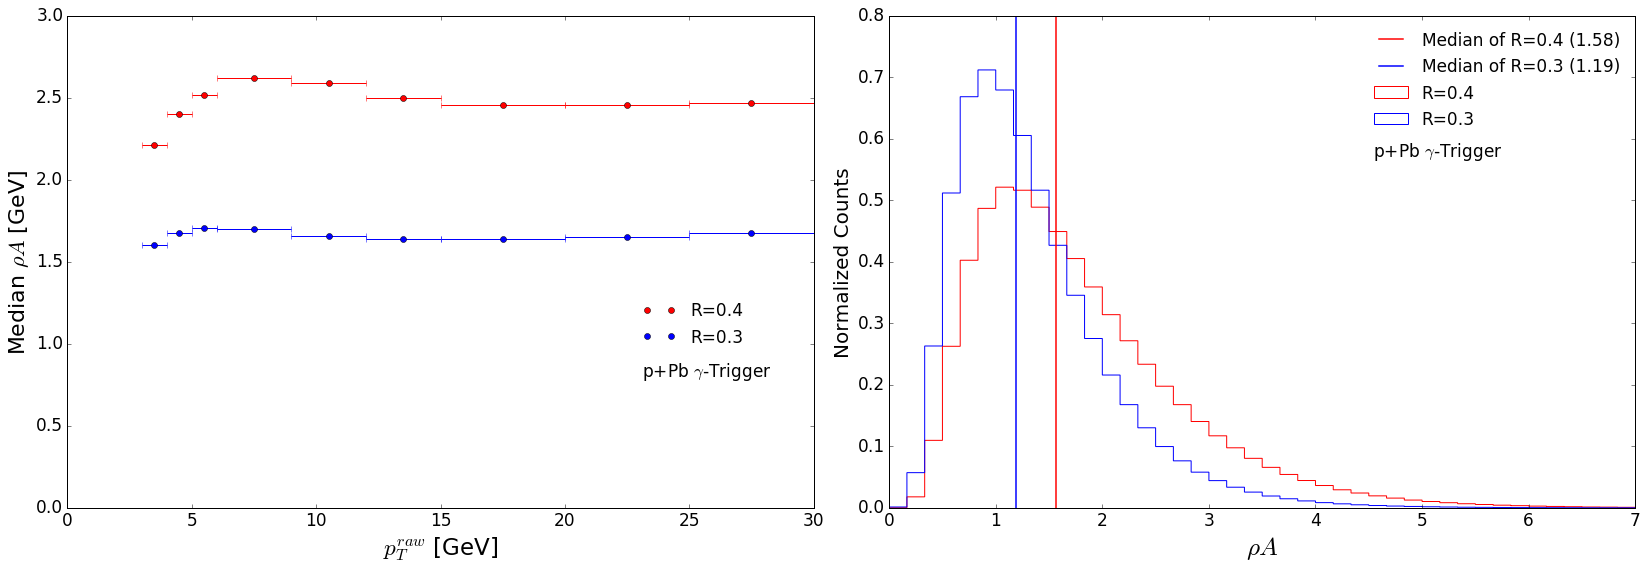

In [17]:
##########Plot R=0.3,0.4 for pPb data##########

ue_pt_pPbmean = [3.5,4.5,5.5,7.5,10.5,13.5,17.5,22.5,27.5]
ue_pt_pPberror = [0.5,0.5,0.5,1.5,1.5,1.5,2.5,2.5,2.5]

fig = plt.figure(figsize=(23,8))

plt.subplot(1,2,1)
plt.plot(ue_pt_pPbmean,pPb_median_subtracted_04,'ro',label=r'R=0.4')
plt.errorbar(ue_pt_pPbmean,pPb_median_subtracted_04,xerr=ue_pt_pPberror,fmt=None,ecolor='r')

# plt.axhline(y=2.75,color='b',linestyle='-',alpha=0.5)
# plt.axhline(y=1.51,color='g',linestyle='-',alpha=0.5)

plt.plot(ue_pt_pPbmean,pPb_median_subtracted_03,'bo',label=r'R=0.3')
plt.errorbar(ue_pt_pPbmean,pPb_median_subtracted_03,xerr=ue_pt_pPberror,fmt=None,ecolor='b')
plt.xlabel(r'$p_{T}^{raw}$ [GeV]',fontsize=23)
plt.xticks(fontsize=17)
plt.ylabel(r'Median $\rho A$ [GeV]',fontsize=22)
plt.yticks(fontsize=17)
plt.ylim((0,3))
plt.text(25.7,0.83,r'p+Pb $\gamma$-Trigger',ha='center',va='center',fontsize=17)
plt.legend(bbox_to_anchor=(0.75,0.45),loc=2,prop={'size':17},frameon=False)

plt.subplot(1,2,2)
plt.hist(pPbHists_04["jet_ak04its_subtracted"],bins=60,range=(0,10),histtype='step',color='red',label = r'R=0.4',normed=1)
plt.hist(pPbHists_03["jet_ak03its_subtracted"],bins=60,range=(0,10),histtype='step',color='blue',label = r'R=0.3',normed=1)

plt.axvline(x=np.median(pPbHists_04["jet_ak04its_subtracted"]),color='r',linestyle='-',linewidth=1.5,label='Median of R=0.4 (1.58)')
plt.axvline(x=np.median(pPbHists_03["jet_ak03its_subtracted"]),color='b',linestyle='-',linewidth=1.5,label='Median of R=0.3 (1.19)')

plt.xlabel(r'$\rho A$', fontsize = 25)
plt.xticks(np.arange(0,10,step=1),fontsize=17)
plt.xlim(0,7)
plt.ylabel('Normalized Counts',fontsize=20)
plt.yticks(fontsize=17)
plt.text(5.15,0.58,r'p+Pb $\gamma$-Trigger',ha='center',va='center',fontsize=17)
plt.legend(prop={'size': 17},frameon=False)

fig.tight_layout()
fig.savefig('pPb_median_diffR_AreaRho.pdf')

In [18]:
###########Checking to see if the medians make since (just exploring ranges)##########

pPbHists100_04 = pPbHists_04.query('jet_ak04its_subtracted > 30')

pPbHists100_m_04 = np.median(pPbHists100_04["jet_ak04its_subtracted"])

print np.float(pPbHists100_04.shape[0])/pPbHists_04.shape[0]*100

0.000741634089359


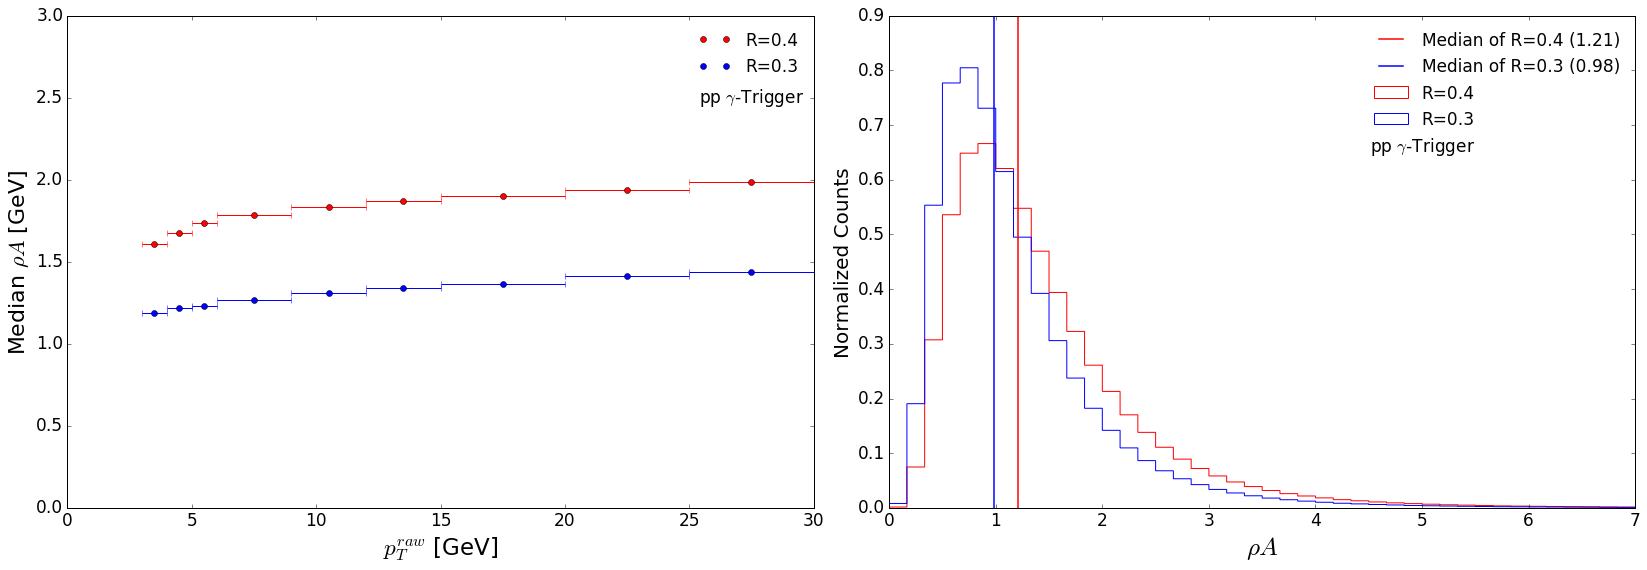

In [19]:
##########Plot R=0.3,0.4 for pp data##########

fig = plt.figure(figsize=(23,8))

plt.subplot(1,2,1)
plt.plot(ue_pt_pPbmean,pp_median_subtracted_04,'ro',label=r'R=0.4')
plt.errorbar(ue_pt_pPbmean,pp_median_subtracted_04,xerr=ue_pt_pPberror,fmt=None,ecolor='r')

# plt.axhline(y=2.75,color='b',linestyle='-',alpha=0.5)
# plt.axhline(y=1.51,color='g',linestyle='-',alpha=0.5)

plt.plot(ue_pt_pPbmean,pp_median_subtracted_03,'bo',label=r'R=0.3')
plt.errorbar(ue_pt_pPbmean,pp_median_subtracted_03,xerr=ue_pt_pPberror,fmt=None,ecolor='b')
plt.xlabel(r'$p_{T}^{raw}$ [GeV]',fontsize=23)
plt.xticks(fontsize=17)
plt.ylabel(r'Median $\rho A$ [GeV]',fontsize=22)
plt.yticks(fontsize=17)
plt.ylim((0,3))
plt.text(27.5,2.5,r'pp $\gamma$-Trigger', ha='center', va='center',fontsize=17)
plt.legend(prop={'size':17},frameon=False)

plt.subplot(1,2,2)
plt.hist(ppHists_04["jet_ak04its_subtracted"],bins=60,range=(0,10),histtype='step',color='red',label = r'R=0.4',normed=1)
plt.hist(ppHists_03["jet_ak03its_subtracted"],bins=60,range=(0,10),histtype='step',color='blue',label = r'R=0.3',normed=1)

plt.axvline(x=np.median(ppHists_04["jet_ak04its_subtracted"]),color='r',linestyle='-',linewidth=1.5,label='Median of R=0.4 (1.21)')
plt.axvline(x=np.median(ppHists_03["jet_ak03its_subtracted"]),color='b',linestyle='-',linewidth=1.5,label='Median of R=0.3 (0.98)')

plt.xlabel(r'$\rho A$', fontsize = 25)
plt.xticks(np.arange(0,10,step=1),fontsize=17)
plt.xlim(0,7)
plt.ylabel('Normalized Counts',fontsize=20)
plt.yticks(fontsize=17)
plt.text(5,0.66,r'pp $\gamma$-Trigger', ha='center', va='center',fontsize=17)
plt.legend(prop={'size': 17},frameon=False)

fig.tight_layout()

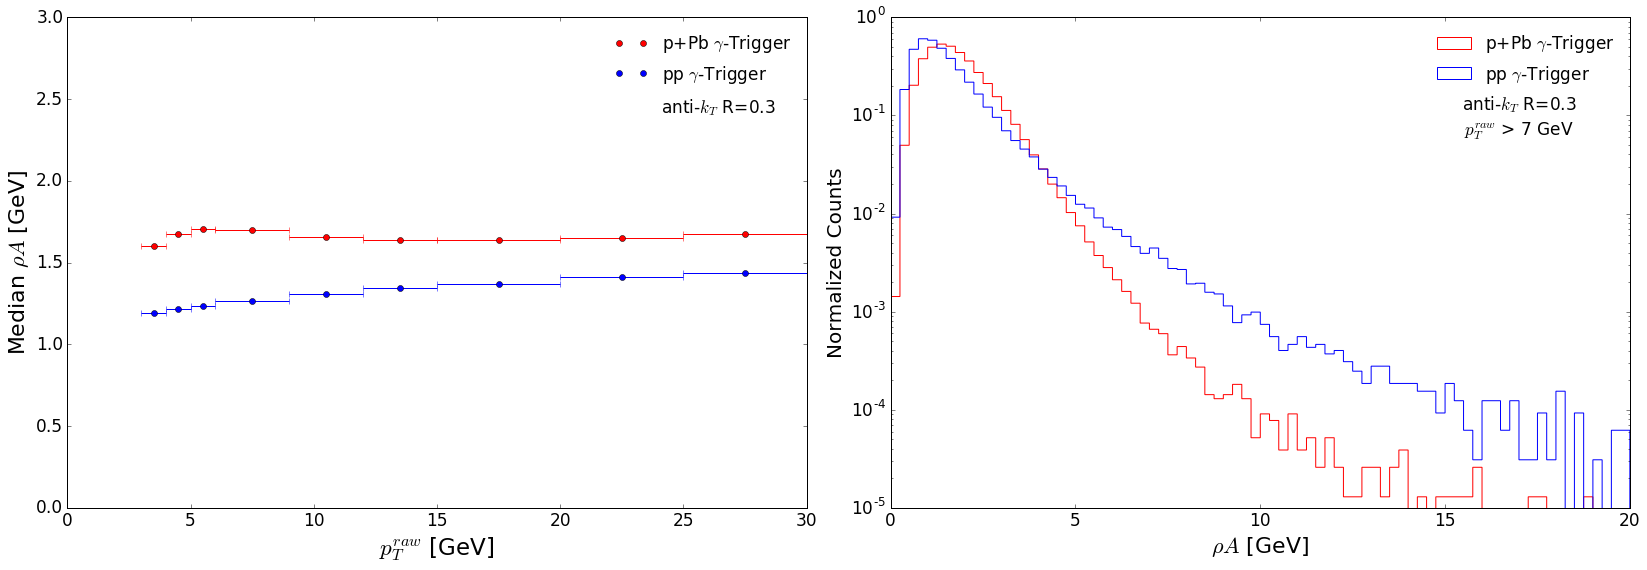

In [20]:
##########pp and p+Pb with R=0.3##########

fig = plt.figure(figsize=(23,8))

plt.subplot(1,2,1)

plt.plot(ue_pt_pPbmean,pPb_median_subtracted_03,'ro',label=r'p+Pb $\gamma$-Trigger')
plt.errorbar(ue_pt_pPbmean,pPb_median_subtracted_03,xerr=ue_pt_pPberror,fmt=None,ecolor='r')

# plt.axhline(y=2.75,color='b',linestyle='-',alpha=0.5)
# plt.axhline(y=1.51,color='g',linestyle='-',alpha=0.5)

plt.plot(ue_pt_pPbmean,pp_median_subtracted_03,'bo',label=r'pp $\gamma$-Trigger')
plt.errorbar(ue_pt_pPbmean,pp_median_subtracted_03,xerr=ue_pt_pPberror,fmt=None,ecolor='b')
plt.xlabel(r'$p_{T}^{raw}$ [GeV]',fontsize=23)
plt.xticks(fontsize=17)
plt.ylabel(r'Median $\rho A$ [GeV]',fontsize=22)
plt.yticks(fontsize=17)
plt.ylim((0,3))
plt.text(26.4,2.45,r'anti-$k_T$ R=0.3', ha='center', va='center',fontsize=17)
plt.legend(prop={'size':17},frameon=False)

plt.subplot(1,2,2)

pPbHists_G7_03 = pPbHists_03.query('jet_ak03its_pt_new > 7.0 and jet_ak03its_pt_new < 20.0')
ppHists_G7_03 = ppHists_03.query('jet_ak03its_pt_new > 7.0 and jet_ak03its_pt_new < 20.0')

plt.hist(pPbHists_G7_03['jet_ak03its_subtracted'],bins=80,range=(0,20),color='r',histtype='step',label=r'p+Pb $\gamma$-Trigger',normed=1)
plt.hist(ppHists_G7_03['jet_ak03its_subtracted'],bins=80,range=(0,20),color='b',histtype='step',label=r'pp $\gamma$-Trigger',normed=1)
plt.xlabel(r'$\rho A$ [GeV]',fontsize=22)
plt.xticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=20)
plt.yticks(fontsize=17)
plt.yscale('log')

plt.text(17,0.13,r'anti-$k_T$ R=0.3',ha='center',va='center',fontsize=17)
plt.text(17,0.07,r'$p^{raw}_T$ > 7 GeV',ha='center',va='center',fontsize=17)

plt.legend(frameon=False,prop={'size':17})

fig.tight_layout()
plt.show()

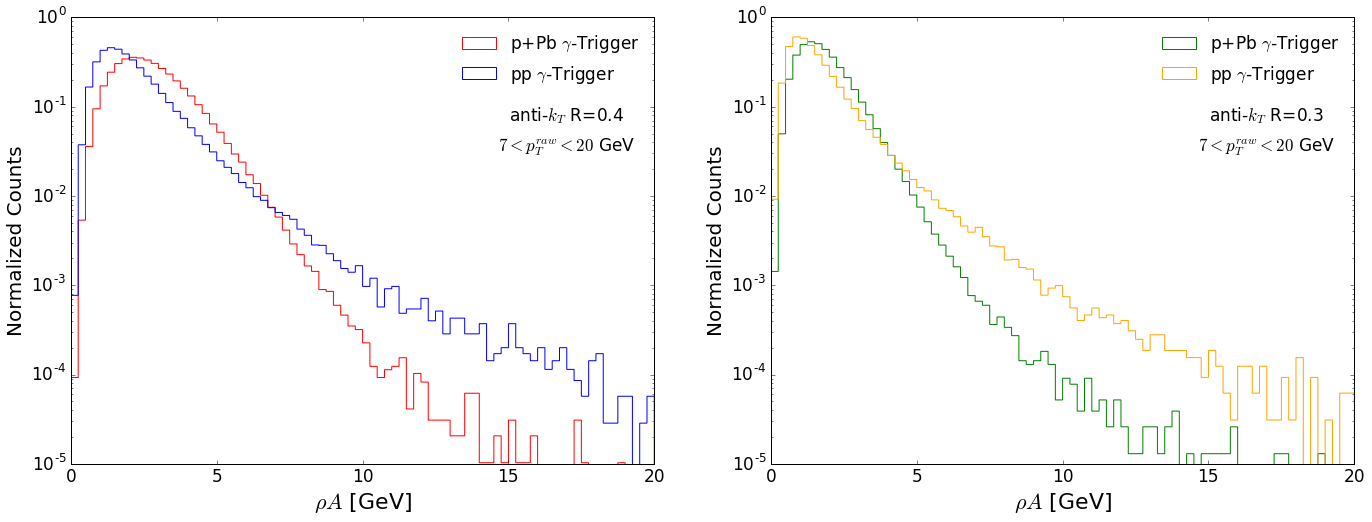

In [21]:
##########Interested in a specific region##########

pPbHists_G7_04 = pPbHists_04.query('jet_ak04its_pt_new > 7.0 and jet_ak04its_pt_new < 20.0');
ppHists_G7_04 = ppHists_04.query('jet_ak04its_pt_new > 7.0 and jet_ak04its_pt_new < 20.0');

##########pp and p+Pb ue-subtraction with different radii##########

fig = plt.figure(figsize=(23,8))

plt.subplot(1,2,1)
plt.hist(pPbHists_G7_04['jet_ak04its_subtracted'],bins=80,range=(0,20),color='r',histtype='step',label=r'p+Pb $\gamma$-Trigger',normed=1)
plt.hist(ppHists_G7_04['jet_ak04its_subtracted'],bins=80,range=(0,20),color='b',histtype='step',label=r'pp $\gamma$-Trigger',normed=1)
plt.xlabel(r'$\rho A$ [GeV]',fontsize=22)
plt.xticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=20)
plt.yticks(fontsize=17)
plt.yscale('log')
plt.text(17,0.08,r'anti-$k_T$ R=0.4',ha='center',va='center',fontsize=17)
plt.text(17,0.035,r'$7 < p_T^{raw} < 20$ GeV',ha='center',va='center',fontsize=17)
plt.legend(prop={'size':17},frameon=False)

plt.subplot(1,2,2)
plt.hist(pPbHists_G7_03['jet_ak03its_subtracted'],bins=80,range=(0,20),color='g',histtype='step',label=r'p+Pb $\gamma$-Trigger',normed=1)
plt.hist(ppHists_G7_03['jet_ak03its_subtracted'],bins=80,range=(0,20),color='orange',histtype='step',label=r'pp $\gamma$-Trigger',normed=1)
plt.xlabel(r'$\rho A$ [GeV]',fontsize=22)
plt.xticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=20)
plt.yticks(fontsize=17)
plt.yscale('log')
plt.text(17,0.08,r'anti-$k_T$ R=0.3', ha='center', va='center',fontsize=17)
plt.text(17,0.035,r'$7 < p_T^{raw} < 20$ GeV', ha='center', va='center',fontsize=17)
plt.legend(prop={'size':17},frameon=False)

In [22]:
###########Compare the above pp to MC##########

###########Read the MC files##########

mc_18b10a_files = ['18b10a_calo_pthat1.root','18b10a_calo_pthat2.root','18b10a_calo_pthat3.root','18b10a_calo_pthat4.root','18b10a_calo_pthat5.root','18b10a_calo_pthat6.root']
mc_18b10a_03 = getJet03(mc_18b10a_files)
mc_18b10a_04 = getJet04(mc_18b10a_files)
print '\n'

###########Apply appropriate cuts##########

mc_18b10a_Hists_03 = applyCuts03(mc_18b10a_03)
mc_18b10a_Hists_04 = applyCuts04(mc_18b10a_04)

mc_18b10a_Hists_03_G7 = mc_18b10a_Hists_03.query('jet_ak03its_pt_new > 7.0 and jet_ak03its_pt_new < 20.0')
mc_18b10a_Hists_04_G7 = mc_18b10a_Hists_04.query('jet_ak04its_pt_new > 7.0 and jet_ak04its_pt_new < 20.0')

Processed 18b10a_calo_pthat1.root in 16.666697979 seconds
Processed 18b10a_calo_pthat2.root in 35.7911429405 seconds
Processed 18b10a_calo_pthat3.root in 21.2032170296 seconds
Processed 18b10a_calo_pthat4.root in 24.2234420776 seconds
Processed 18b10a_calo_pthat5.root in 32.4058887959 seconds
Processed 18b10a_calo_pthat6.root in 33.3503551483 seconds
Processed 18b10a_calo_pthat1.root in 16.196046114 seconds
Processed 18b10a_calo_pthat2.root in 35.8637850285 seconds
Processed 18b10a_calo_pthat3.root in 20.2634041309 seconds
Processed 18b10a_calo_pthat4.root in 24.9659337997 seconds
Processed 18b10a_calo_pthat5.root in 31.356954813 seconds
Processed 18b10a_calo_pthat6.root in 34.5600690842 seconds


|eta| < 0.5: 23098329  fraction kept: 50.0
|eta| < 0.5: 19430639  fraction kept: 49.0


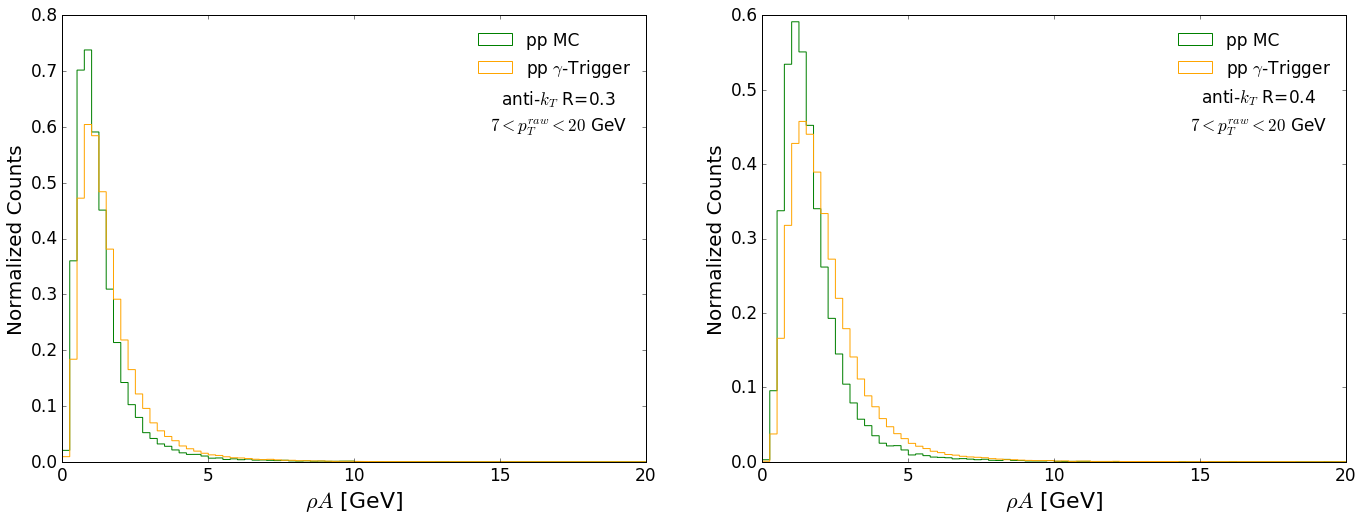

In [23]:
###########Plot the distributions###########

fig = plt.figure(figsize=(23,8))

plt.subplot(1,2,1)
plt.hist(mc_18b10a_Hists_03_G7['jet_ak03its_subtracted'],bins=80,weights=mc_18b10a_Hists_03_G7['weights'],range=(0,20),color='g',histtype='step',label=r'pp MC',normed=1)
plt.hist(ppHists_G7_03['jet_ak03its_subtracted'],bins=80,range=(0,20),color='orange',histtype='step',label=r'pp $\gamma$-Trigger',normed=1)
plt.xlabel(r'$\rho A$ [GeV]',fontsize=22)
plt.xticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=20)
plt.yticks(fontsize=17)
plt.text(17,0.65,r'anti-$k_T$ R=0.3', ha='center', va='center',fontsize=17)
plt.text(17,0.6,r'$7 < p_T^{raw} < 20$ GeV', ha='center', va='center',fontsize=17)
plt.legend(prop={'size':17},frameon=False)

plt.subplot(1,2,2)
plt.hist(mc_18b10a_Hists_04_G7['jet_ak04its_subtracted'],bins=80,weights=mc_18b10a_Hists_04_G7['weights'],range=(0,20),color='g',histtype='step',label=r'pp MC',normed=1)
plt.hist(ppHists_G7_04['jet_ak04its_subtracted'],bins=80,range=(0,20),color='orange',histtype='step',label=r'pp $\gamma$-Trigger',normed=1)
plt.xlabel(r'$\rho A$ [GeV]',fontsize=22)
plt.xticks(fontsize=17)
plt.ylabel(r'Normalized Counts',fontsize=20)
plt.yticks(fontsize=17)
plt.text(17,0.49,r'anti-$k_T$ R=0.4',ha='center',va='center',fontsize=17)
plt.text(17,0.45,r'$7 < p_T^{raw} < 20$ GeV',ha='center',va='center',fontsize=17)
plt.legend(prop={'size':17},frameon=False)

In [24]:
##########Create an overflow bin##########

def plot_histogram(Dataframe1,Dataframe2,Dataframe3,Dataframe4,label1,label2):

    data1 = Dataframe1['jet_ak03its_subtracted']
    data2 = Dataframe2['jet_ak03its_subtracted']
    data3 = Dataframe3['jet_ak04its_subtracted']
    data4 = Dataframe4['jet_ak04its_subtracted']
    
    bins = np.arange(0,20.25,0.25)

    fig, ax = plt.subplots(figsize=(20,8))
    
###########First plot##########

    plt.subplot(1,2,1)
    _, bins, patches = plt.hist(np.clip(data1,bins[0],bins[-1]),bins=bins,color='orange',label=label1,normed=1,histtype='step')
    _, bins, patches = plt.hist(np.clip(data2,bins[0],bins[-1]),bins=bins,color='g',label=label2,weights=Dataframe2['weights'],normed=1,histtype='step')
    
    plt.xlim([0, 20])
    x_ticks = np.arange(0,21,2)
    plt.xticks(x_ticks)
    ax.set_xticklabels(x_ticks)
    
    plt.xlabel(r'$\rho A$ [GeV]',fontsize=22)
    plt.xticks(fontsize=17)
    plt.ylabel(r'Normalized Counts',fontsize=20)
    plt.yticks(fontsize=17)
    plt.text(17,0.14,r'anti-$k_T$ R=0.3', ha='center', va='center',fontsize=17)
    plt.text(17,0.07,r'$7 < p_T^{raw} < 20$ GeV', ha='center', va='center',fontsize=17)
    plt.yticks([])
    plt.yscale('log')
    plt.ylim(0.00001,1)
    plt.title('')
    plt.setp(patches,linewidth=1)
    plt.legend(loc='upper right',frameon=False,prop={'size':17})
    
###########Second plot##########
    
    plt.subplot(1,2,2)
    _, bins, patches = plt.hist(np.clip(data3,bins[0],bins[-1]),bins=bins,color='orange',label=label1,normed=1,histtype='step')
    _, bins, patches = plt.hist(np.clip(data4,bins[0],bins[-1]),bins=bins,color='g',label=label2,weights=Dataframe4['weights'],normed=1,histtype='step')

#     xlabels = [str(b) for b in bins[1:]]
#     xlabels[-1] += '+'
    
    plt.xlim([0, 20])
    plt.xticks(x_ticks)
    ax.set_xticklabels(x_ticks)

    plt.xlabel(r'$\rho A$ [GeV]',fontsize=22)
    plt.xticks(fontsize=17)
    plt.ylabel(r'Normalized Counts',fontsize=20)
    plt.yticks(fontsize=17)
    plt.text(17,0.14,r'anti-$k_T$ R=0.4',ha='center',va='center',fontsize=17)
    plt.text(17,0.07,r'$7 < p_T^{raw} < 20$ GeV',ha='center',va='center',fontsize=17)
    plt.yticks([])
    plt.yscale('log')
    plt.title('')
    plt.setp(patches,linewidth=1)
    plt.legend(loc='upper right',frameon=False,prop={'size':17})

    fig.tight_layout()

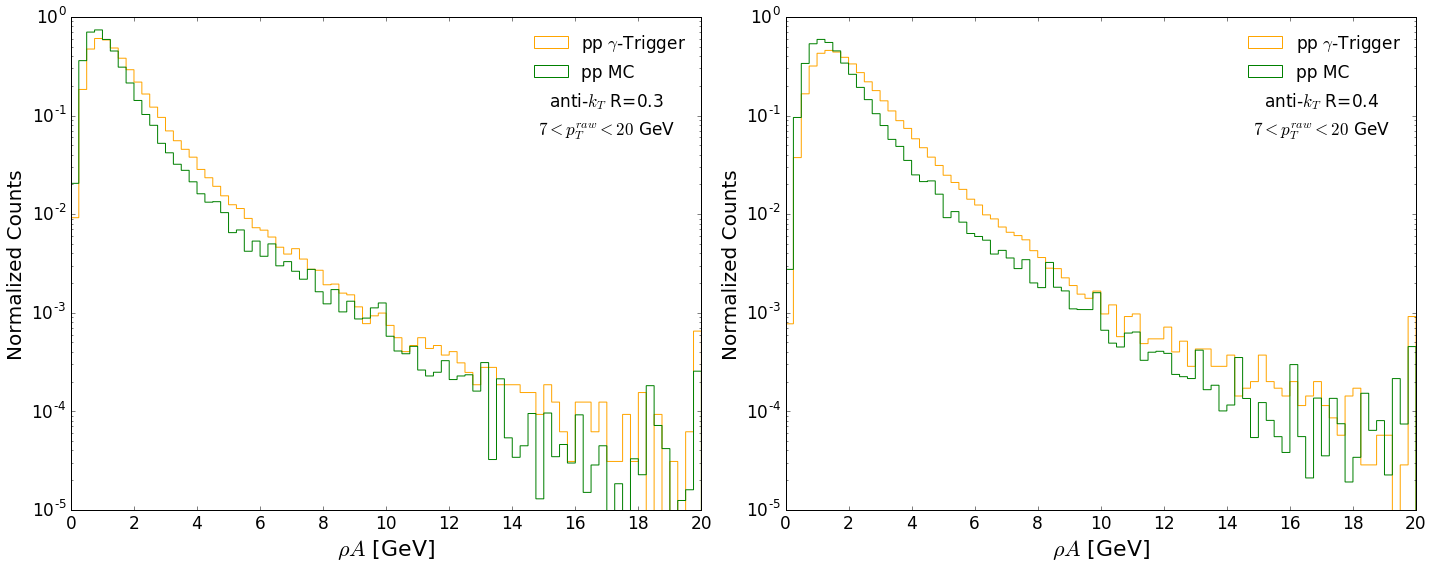

In [25]:
plot_histogram(ppHists_G7_03,mc_18b10a_Hists_03_G7,ppHists_G7_04,mc_18b10a_Hists_04_G7,r'pp $\gamma$-Trigger',r'pp MC')

In [26]:
###########Read the MC files for p+Pb##########

mc_17g6a1_files = ['Skim_17g6a1_pt1.root','Skim_17g6a1_pt2.root','Skim_17g6a1_pt3.root','Skim_17g6a1_pt4.root','Skim_17g6a1_pt5.root']
mc_17g6a1_03 = getJet03(mc_17g6a1_files)
mc_17g6a1_04 = getJet04(mc_17g6a1_files)
print '\n'

###########Apply appropriate cuts##########

mc_17g6a1_Hists_03 = applyCuts03(mc_17g6a1_03)
mc_17g6a1_Hists_04 = applyCuts04(mc_17g6a1_04)

mc_17g6a1_Hists_03_G7 = mc_17g6a1_Hists_03.query('jet_ak03its_pt_new > 7.0 and jet_ak03its_pt_new < 20.0')
mc_17g6a1_Hists_04_G7 = mc_17g6a1_Hists_04.query('jet_ak04its_pt_new > 7.0 and jet_ak04its_pt_new < 20.0')

Processed Skim_17g6a1_pt1.root in 1.48635697365 seconds
Processed Skim_17g6a1_pt2.root in 17.2530071735 seconds
Processed Skim_17g6a1_pt3.root in 20.123251915 seconds
Processed Skim_17g6a1_pt4.root in 4.62925410271 seconds
Processed Skim_17g6a1_pt5.root in 1.51658606529 seconds
Processed Skim_17g6a1_pt1.root in 1.19124507904 seconds
Processed Skim_17g6a1_pt2.root in 12.8092310429 seconds
Processed Skim_17g6a1_pt3.root in 14.6249969006 seconds
Processed Skim_17g6a1_pt4.root in 3.78622078896 seconds
Processed Skim_17g6a1_pt5.root in 1.16625905037 seconds


|eta| < 0.5: 8093545  fraction kept: 48.6
|eta| < 0.5: 6168127  fraction kept: 47.2
